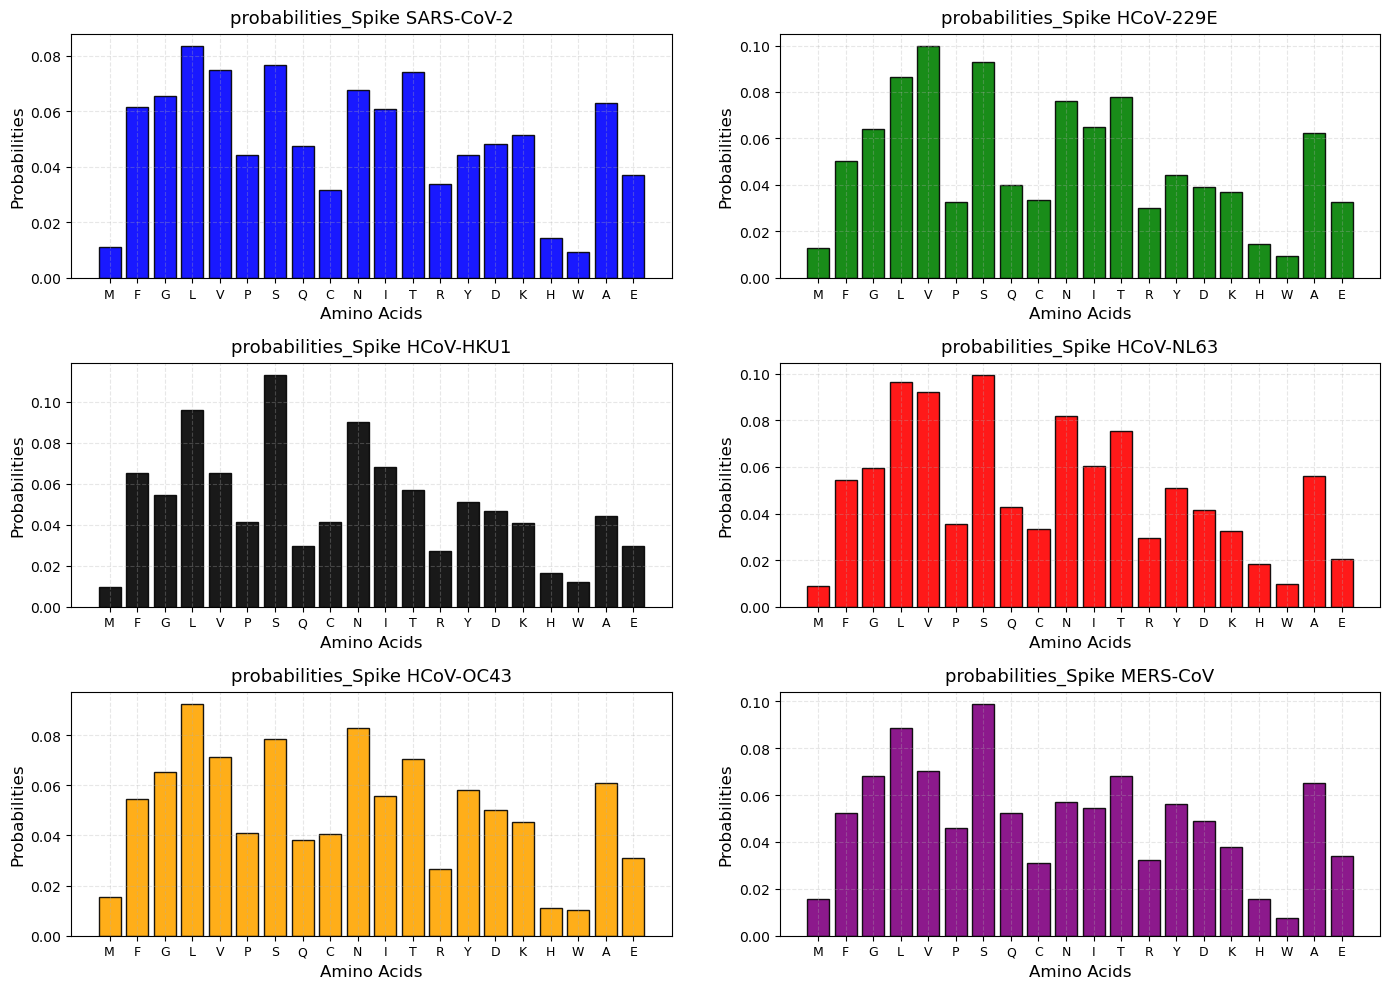

In [4]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fixed order of the 6 Excel files
file_paths = [
    "probabilities_Spike SARS-CoV-2.xlsx",
    "probabilities_Spike HCoV-229E.xlsx",
    "probabilities_Spike HCoV-HKU1.xlsx",
    "probabilities_Spike HCoV-NL63.xlsx",
    "probabilities_Spike HCoV-OC43.xlsx",
    "probabilities_Spike MERS-CoV.xlsx"
]

# Colors (one for each file, in the same order)
manual_colors = ['blue', 'green', 'black', 'red', 'orange', 'purple']

# Create 3x2 panel
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

aminoacids_labels = None  # will store the labels (assuming same across files)
title_names = []          # cleaned names for titles

for i, file_path in enumerate(file_paths):
    # Read worksheet (Sheet1)
    sheet_data = pd.read_excel(file_path, sheet_name='Sheet1')

    # Extract probability columns (from column 2 onward)
    data = sheet_data.iloc[:, 1:].astype(float)
    aminoacids = sheet_data.columns[1:]

    # Store amino acid labels only once
    if aminoacids_labels is None:
        aminoacids_labels = list(aminoacids)

    # Probabilities from the first sequence (row 0)
    mean_probs = data.iloc[0]

    # X axis    
    x = np.arange(len(mean_probs))
    aminoacids_labels = list(mean_probs.index)

    # Short name for subplot title/legend
    short_name = (file_path
                  .replace('probabilidades_', '')
                  .replace('.xlsx', ''))
    title_names.append(short_name)

    # Plot in the corresponding subplot
    ax = axes[i]
    ax.bar(x, mean_probs.values,
           color=manual_colors[i],
           edgecolor='black',
           alpha=0.9)

    # Axis formatting for each subplot
    ax.set_xlabel('Amino Acids', fontsize=12)
    ax.set_ylabel('Probabilities', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(aminoacids_labels, rotation=0, fontsize=9)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_title(short_name, fontsize=13, pad=8)

# Remove empty subplots if any (not necessary here, but keeps script robust)
for j in range(len(file_paths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.18)  # spacing between subplots

# Save figure
plt.savefig('Barplot Panel minoAcid Probabilities.png', dpi=300, bbox_inches='tight')
plt.show()
